## Import Libary dan dataset

In [28]:
import pandas as pd
import numpy as np
import warnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('/content/tourism_rating.csv')
df1 = pd.read_csv('/content/tourism_with_id.csv')

## Exploratory Data Analysis

Dataset tourism_rating

In [30]:
# menampilkan 3 overview dataset df secara random
df.sample(3)

,User_Id,Place_Id,Place_Ratings
1074,34,341,3
5589,169,180,3
8804,265,23,2


In [31]:
# cek dimensi pada dataset df
print("Total Rows: {} dan Cols: {}".format(df.shape[0], df.shape[1]))

Total Rows: 10000 dan Cols: 3


In [32]:
# cek informasi dari tiap fitur df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [33]:
# cek total user pada dataset df
len(df['User_Id'].unique())

300

In [34]:
# cek total place yang diberi rating 
len(df['Place_Id'].unique())

437

In [35]:
# cek statistika deskripsi dari dataset
df.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


Dataset tourism_with_id  

In [36]:
# menampilkan 3 overview dataset df1 secara random
df1.sample(3)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
384,385,Kampung Batik Gedong Semarang,Kampung Batik Semarang merupakan salah satu ka...,Budaya,Semarang,0,4.4,45.0,"{'lat': -6.968882100000001, 'lng': 110.4318692}",-6.968882,110.431869,NaN,385
17,18,Museum Bank Indonesia,Museum Bank Indonesia adalah sebuah museum di ...,Budaya,Jakarta,2000,4.7,NaN,"{'lat': -6.137127, 'lng': 106.813005}",-6.137127,106.813005,NaN,18
125,126,Pantai Goa Cemara,Pantai Goa Cemara (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ ꦒꦸꦮ​ ꦕ...,Bahari,Yogyakarta,4000,4.3,NaN,"{'lat': -7.999422999999998, 'lng': 110.248963}",-7.999423,110.248963,NaN,126


In [37]:
# cek dimensi pada dataset df1
print("Total Rows: {} dan Cols: {}".format(df1.shape[0], df1.shape[1]))

Total Rows: 437 dan Cols: 13


In [38]:
# cek informasi dari tiap fitur df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [39]:
# cek total place pada dataset df1
len(df1['Place_Id'].unique())

437

In [40]:
# cek sebaran kota wisata pada dataset
cols = df1['City'].value_counts()
cols = cols.keys()

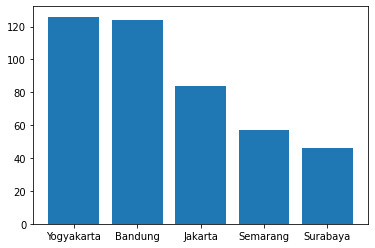

In [41]:
import matplotlib.pyplot as plt
plt.bar(x=cols,height=df1['City'].value_counts())
plt.show()

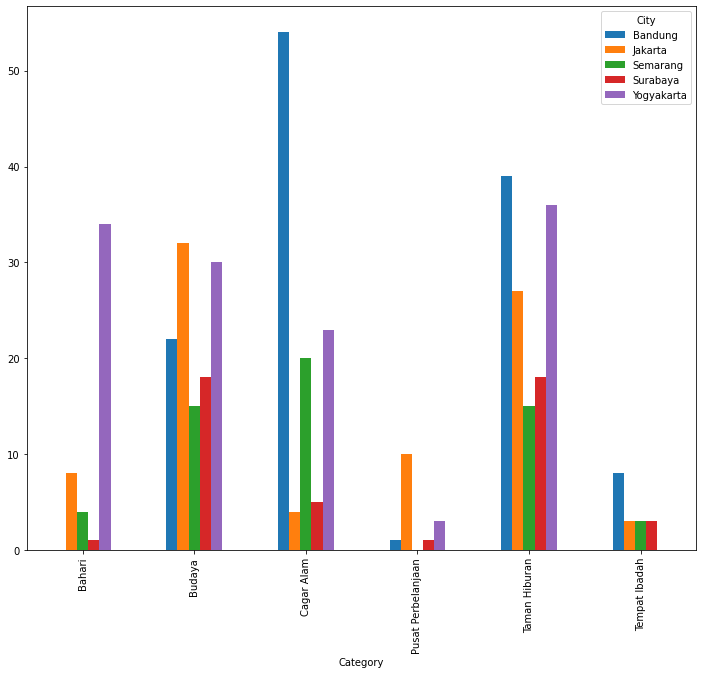

In [42]:
table = pd.crosstab(df1['Category'], df1['City'])
table.plot(kind="bar", figsize=(12,10))

In [43]:
# cek statika deskripsi dari dataset
df1.describe()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,0.0,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142,NaN,219.000000
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848,NaN,126.295289
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398,NaN,1.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369,NaN,110.000000
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468,NaN,219.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869,NaN,328.000000
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662,NaN,437.000000


## Data Cleaning

Dataset tourism_rating

In [44]:
Total = df.isnull().sum().sort_values(ascending=False)          

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
User_Id,0,0.0
Place_Id,0,0.0
Place_Ratings,0,0.0


In [45]:
df.duplicated().sum()

79

In [46]:
df.drop_duplicates(inplace=True)

In [47]:
df.duplicated().sum()

0

In [48]:
df['Place_Ratings'] = df['Place_Ratings'].astype('float')

Dataset tourism_with_id  

In [49]:
Total = df1.isnull().sum().sort_values(ascending=False)          

Percent = (df1.isnull().sum()*100/df1.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Unnamed: 11,437,100.000000
Time_Minutes,232,53.089245
Place_Id,0,0.000000
Place_Name,0,0.000000
Description,0,0.000000
Category,0,0.000000
City,0,0.000000
Price,0,0.000000
Rating,0,0.000000
Coordinate,0,0.000000


In [50]:
df1.duplicated().sum()

0

In [51]:
df1.drop(columns=['Coordinate', 'Lat', 'Long', 'Unnamed: 11',
       'Unnamed: 12', 'Time_Minutes', 'Rating', 'Description'], inplace=True)

In [52]:
df = pd.merge(df, df1, on='Place_Id')

In [53]:
df.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Category,City,Price
0,1,179,3.0,Candi Ratu Boko,Budaya,Yogyakarta,75000
1,22,179,4.0,Candi Ratu Boko,Budaya,Yogyakarta,75000
2,40,179,3.0,Candi Ratu Boko,Budaya,Yogyakarta,75000
3,49,179,5.0,Candi Ratu Boko,Budaya,Yogyakarta,75000
4,74,179,3.0,Candi Ratu Boko,Budaya,Yogyakarta,75000


## Preprocessing

In [54]:
place_ids = df['Place_Id'].unique().tolist()
user_ids = df['User_Id'].unique().tolist()

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

encoded userID :  {1: 0, 22: 1, 40: 2, 49: 3, 74: 4, 76: 5, 84: 6, 127: 7, 134: 8, 142: 9, 151: 10, 183: 11, 188: 12, 192: 13, 204: 14, 227: 15, 230: 16, 250: 17, 256: 18, 268: 19, 270: 20, 271: 21, 272: 22, 10: 23, 14: 24, 19: 25, 20: 26, 24: 27, 28: 28, 32: 29, 35: 30, 37: 31, 51: 32, 52: 33, 75: 34, 105: 35, 137: 36, 141: 37, 144: 38, 153: 39, 165: 40, 166: 41, 173: 42, 187: 43, 191: 44, 195: 45, 235: 46, 258: 47, 261: 48, 266: 49, 280: 50, 281: 51, 4: 52, 11: 53, 12: 54, 53: 55, 87: 56, 92: 57, 103: 58, 106: 59, 109: 60, 116: 61, 120: 62, 139: 63, 179: 64, 212: 65, 222: 66, 226: 67, 232: 68, 238: 69, 21: 70, 30: 71, 42: 72, 57: 73, 58: 74, 79: 75, 94: 76, 98: 77, 113: 78, 148: 79, 152: 80, 159: 81, 231: 82, 239: 83, 245: 84, 251: 85, 295: 86, 299: 87, 18: 88, 31: 89, 71: 90, 83: 91, 96: 92, 123: 93, 125: 94, 170: 95, 201: 96, 210: 97, 247: 98, 249: 99, 252: 100, 260: 101, 265: 102, 275: 103, 283: 104, 38: 105, 54: 106, 55: 107, 59: 108, 65: 109, 72: 110, 80: 111, 86: 112, 118: 113,

In [55]:
# Melakukan proses encoding placeID
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}
 
# Melakukan proses encoding angka ke placeID
place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}

In [56]:
# Mapping userID ke dataframe user
df['user'] = df['User_Id'].map(user_to_user_encoded)
 
# Mapping placeID ke dataframe resto
df['place'] = df['Place_Id'].map(place_to_place_encoded)

In [57]:
df.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Category,City,Price,user,place
0,1,179,3.0,Candi Ratu Boko,Budaya,Yogyakarta,75000,0,0
1,22,179,4.0,Candi Ratu Boko,Budaya,Yogyakarta,75000,1,0
2,40,179,3.0,Candi Ratu Boko,Budaya,Yogyakarta,75000,2,0
3,49,179,5.0,Candi Ratu Boko,Budaya,Yogyakarta,75000,3,0
4,74,179,3.0,Candi Ratu Boko,Budaya,Yogyakarta,75000,4,0


In [58]:
df = df.sample(frac=1, random_state=42)
df

,User_Id,Place_Id,Place_Ratings,Place_Name,Category,City,Price,user,place
5268,104,127,4.0,Blue Lagoon Jogja,Taman Hiburan,Yogyakarta,10000,159,221
510,241,76,1.0,Taman Cattleya,Taman Hiburan,Jakarta,20000,248,19
4328,120,28,5.0,Wisata Agro Edukatif Istana Susu Cibugary,Taman Hiburan,Jakarta,35000,62,181
8380,239,356,5.0,Saloka Theme Park,Taman Hiburan,Semarang,150000,83,361
9033,276,273,4.0,Curug Bugbrug,Cagar Alam,Bandung,7500,199,391
...,...,...,...,...,...,...,...,...,...
5734,145,177,3.0,Pantai Parangtritis,Bahari,Yogyakarta,10000,285,242
5191,31,6,2.0,Taman Impian Jaya Ancol,Taman Hiburan,Jakarta,25000,89,218
5390,163,94,5.0,Sumur Gumuling,Taman Hiburan,Yogyakarta,7000,129,226
860,262,85,1.0,Taman Pintar Yogyakarta,Taman Hiburan,Yogyakarta,6000,184,33


In [59]:
min_rating = min(df['Place_Ratings'])
 
# Nilai maksimal rating
max_rating = max(df['Place_Ratings'])


# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['User_Id', 'Place_Id']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[104 127]
 [241  76]
 [120  28]
 ...
 [163  94]
 [262  85]
 [297  38]] [0.75 0.   1.   ... 1.   0.   0.5 ]


## Modelling

In [60]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.place_embedding = layers.Embedding( # layer embeddings resto
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    place_vector = self.place_embedding(inputs[:, 1]) # memanggil layer embedding 3
    place_bias = self.place_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_place = tf.tensordot(user_vector, place_vector, 2) 
 
    x = dot_user_place + user_bias + place_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [61]:
# Mendapatkan jumlah user
num_users = len(df['User_Id'])
print(num_users)
 
# Mendapatkan jumlah resto
num_place = len(df['Place_Id'])
print(num_place)

model = RecommenderNet(num_users, num_place, 100) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adagrad(learning_rate=0.01),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

9921
9921


In [62]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 24,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
331/331 [==============================] - 9s 24ms/step - loss: 0.1200 - root_mean_squared_error: 0.3458 - val_loss: 0.1188 - val_root_mean_squared_error: 0.3442
Epoch 2/10
331/331 [==============================] - 8s 23ms/step - loss: 0.1199 - root_mean_squared_error: 0.3457 - val_loss: 0.1188 - val_root_mean_squared_error: 0.3441
Epoch 3/10
331/331 [==============================] - 8s 23ms/step - loss: 0.1198 - root_mean_squared_error: 0.3455 - val_loss: 0.1188 - val_root_mean_squared_error: 0.3441
Epoch 4/10
331/331 [==============================] - 7s 22ms/step - loss: 0.1197 - root_mean_squared_error: 0.3454 - val_loss: 0.1188 - val_root_mean_squared_error: 0.3441
Epoch 5/10
331/331 [==============================] - 7s 21ms/step - loss: 0.1197 - root_mean_squared_error: 0.3453 - val_loss: 0.1188 - val_root_mean_squared_error: 0.3440
Epoch 6/10
331/331 [==============================] - 7s 22ms/step - loss: 0.1195 - root_mean_squared_error: 0.3451 - val_loss: 0.1187 

## Evaluation

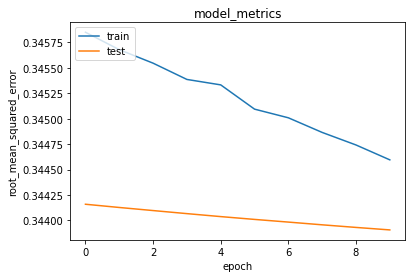

In [63]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Testing model

In [64]:
place_df = df
df2 = df

# Mengambil sample user
user_id = df2.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]
place_not_visited = place_df[~place_df['Place_Id'].isin(place_visited_by_user.Place_Id.values)]['Place_Id'] 

In [65]:
place_visited_by_user['Place_Id'] is place_not_visited

False

In [66]:
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

In [68]:
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [69]:
ratings = model.predict(user_place_array).flatten()


13/13 [==============================] - 0s 2ms/step


In [70]:
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]

In [71]:
place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )

,User_Id,Place_Id,Place_Ratings,Place_Name,Category,City,Price,user,place
6856,201,289,5.0,Curug Aseupan,Cagar Alam,Bandung,10000,96,291
7426,201,374,5.0,Hutan Pinus Kayon,Cagar Alam,Semarang,6000,96,318
9747,201,217,5.0,Kebun Binatang Bandung,Cagar Alam,Bandung,20000,96,426
8691,201,110,5.0,Monumen Serangan Umum 1 Maret,Taman Hiburan,Yogyakarta,3000,96,376
1346,201,321,5.0,Glamping Lakeside Rancabali,Taman Hiburan,Bandung,30000,96,53
8613,201,353,5.0,Taman Srigunting,Taman Hiburan,Semarang,0,96,372
4763,201,236,5.0,Taman Balai Kota Bandung,Taman Hiburan,Bandung,0,96,199
5948,201,8,5.0,Ocean Ecopark,Taman Hiburan,Jakarta,180000,96,250
7121,201,418,5.0,Museum Sepuluh Nopember Kota Surabaya,Budaya,Surabaya,5000,96,304
9762,201,57,4.0,Taman Lapangan Banteng,Taman Hiburan,Jakarta,0,96,427


In [72]:
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Place with high ratings from user')
print('----' * 8)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = place_df[place_df['Place_Id'].isin(top_place_user)].drop_duplicates(subset=['Place_Id'])
for row in place_df_rows.itertuples():
    print(row.Place_Name, ':', row.City)

print('----' * 8)
print('Top 10 place recommendation')
print('----' * 8)

recommended_place = place_df[place_df['Place_Id'].isin(recommended_place_ids)].drop_duplicates(subset=['Place_Id'])
for row in recommended_place.itertuples():
    print(row.Place_Name, ':', row.City)

Showing recommendations for users: 201
Place with high ratings from user
--------------------------------
Hutan Pinus Kayon : Semarang
Curug Aseupan : Bandung
Kebun Binatang Bandung : Bandung
Monumen Serangan Umum 1 Maret : Yogyakarta
Glamping Lakeside Rancabali : Bandung
--------------------------------
Top 10 place recommendation
--------------------------------
Panama Park 825 : Bandung
Bumi Perkemahan Batu Kuda : Bandung
Museum Barli : Bandung
Sudut Pandang Bandung : Bandung
Situ Patenggang : Bandung
Teras Cikapundung BBWS : Bandung
Taman Vanda : Bandung
Bukit Bintang : Bandung
Museum Gedung Sate : Bandung
Monumen Bandung Lautan Api : Bandung
